In [3]:
#importing python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading file in the directory
data = pd.read_csv("C:\\Users\\Kirti\\Downloads\\Default_Fin (1).csv")
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
#Q1
#Number of people who will be given a grace period of exactly 15 days

count=len(data[(data["Defaulted?"]==1) & (data["Annual Salary"]>100000) & (data["Bank Balance"]>5000) & (data["Employed"]!=0)])
print(count)

206


In [6]:
#Q2
#Maximum fine levied by the bank in the period of 15 days

maxbalance=data["Bank Balance"][(data["Defaulted?"]==1) & (data["Annual Salary"]>100000) & (data["Bank Balance"]>5000)].max()
maxfine=(2.5*maxbalance*15)/100
print(maxfine)

11944.44


In [7]:
#Q3
#Assuming all the defaulters haven't paid the EMI get grace, total amount of fine generated by the bank

total_fine=0
for i in data.Index:
 if data.loc[i-1,'Defaulted?']==0:
   total_fine+=(2.5*data.loc[i-1,'Bank Balance']*15)/100
#Rounding off to 4 decimal places
print(round(total_fine,4))

34972758.9


In [8]:
#Adding a column of whether Grace Period is given or not
data['Grace?']=((data['Defaulted?']==1) & (data['Bank Balance']>5000) & (data["Annual Salary"]>100000)).astype(int)
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Grace?
0,1,1,8754.36,532339.56,0,0
1,2,0,9806.16,145273.56,0,0
2,3,1,12882.60,381205.68,0,0
3,4,1,6351.00,428453.88,0,0
4,5,1,9427.92,461562.00,0,0


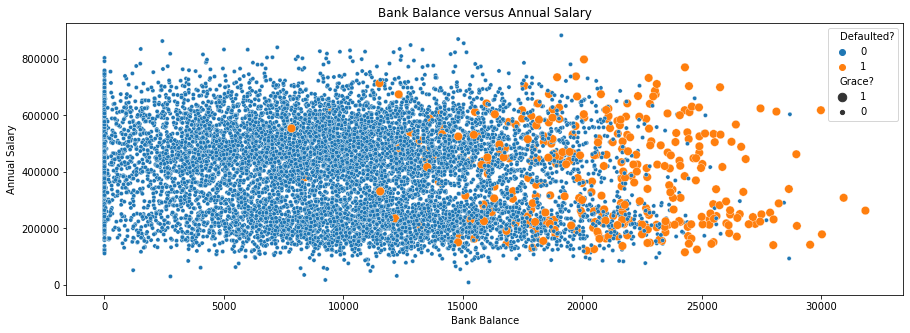

In [10]:
#Q4
#Plot to show the difference between the bank balance of people eligible for grace period and the people who aren't

plt.figure(figsize=(15,5))
sns.scatterplot(data=data, x='Bank Balance', y='Annual Salary', hue='Defaulted?', hue_order=[0,1], size='Grace?', size_order=[1,0])
plt.title('Bank Balance versus Annual Salary')
plt.show()

In [ ]:
Explaination:

1.People who are no defauled are shown with blue dots
2.All the people who are defaulted(orange dots), have bank balance>5000
3.People eligible for grace period are shown with large orange dots
4.Count of people who are defaulted and are not eligible for grace period=0 (small orange dots)

In [ ]:
Conclusion:

From the graph plotted above, we can see that-

1.All defaulters are eligible for the grace period
2.People with bank balance between (5000, 15000) are least likely to be defaulted and thus eligible for grace period as compared to people with bank balance in range of (15000, 30000)

In [11]:
#Q5
#Difference in the median of the Bank Balance of people eligible for Grace Period and people who aren't

M1=data["Bank Balance"].median()
M2=data["Bank Balance"][(data["Annual Salary"]>100000) & (data["Bank Balance"]>5000)].median()
Diff=M2-M1
#rounding off to 4 decimal places
print(round(Diff,4))

1614.42


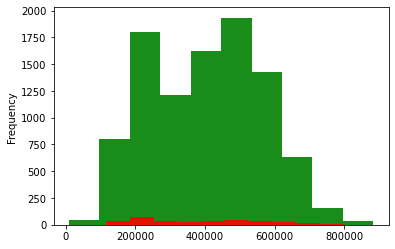

In [14]:
#Q6
#Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.
#plot of people who are not eligible for the grace period
non_eligible_people=data.loc[data["Grace?"]==0,"Annual Salary"]
non_eligible_people.plot.hist(color="green",alpha=0.9)

# plot of people who are eligible for the grace period
eligible_people=data.loc[data["Grace?"]==1,"Annual Salary"]
eligible_people.plot.hist(color="red",alpha=0.9)

plt.show()

In [ ]:
Explanation:
    
1.All the people who are defaulted are eligible for grace period as well (in red)
2.Graph show value=0 for the interval when Annual Balance <10000 i.e. no defaulters in that category

In [ ]:
Coclusion:
    
1.People eligible for grace period (in red) are widespread across the whole graph except for Annual Balance<10000.
2.This shows that people with all kind of annual balance are defaulted.
4.All the defaulters are eligible for grace period.
3.The count of people not defaulted and thus not eligible for grace period (in green) is far more as compared to those who are defaulted and eligible for grace period(in red)